In [26]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn import datasets



In [27]:
# Load the iris dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


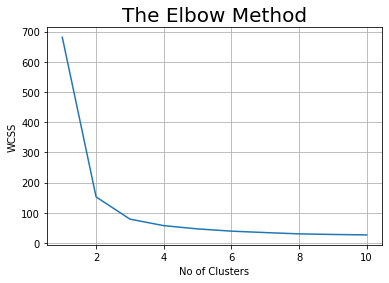

In [14]:
# Kmeans algorithm (Determining the optimal number of clusters using the elbow method)

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans

wcss= []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
#Plotting Number of clusters against Within clusters sum of squares (WCSS)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [16]:
# Applying kmeans to the dataset 

km = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = km.fit_predict(x)

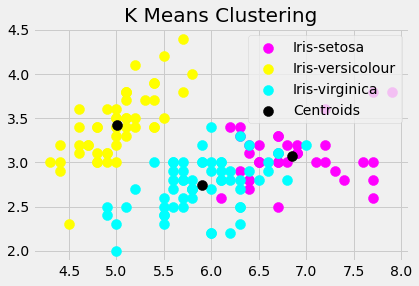

In [31]:
# Visualizing the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'magenta', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'cyan', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize= 20)
plt.legend(loc=1)
plt.grid(True)
plt.show()